## <font color=#B40431>COMPUTATIONAL ANALYSIS OF GENE EXPRESSION IN STRESS AND BRAIN


<b><font size=3>Psychological stress affects brain functions and has an influence on structural changes.
With the help of DNA microarray, gene expressions of human brain during stress response are analyzed. </font>

### <font color=#B40431>HPA - Hypothalamic Pituitary Adrenal and the Pre Frontal Cortex

<img src="https://data.integrativepro.com/images/hpa-axis-stress-response.png" height="222" width="322" align="left">
<img src="https://www.hindawi.com/journals/ecam/2011/950461.fig.001.jpg" height="222" width="322" align="right">

<b><font size=3> STRESS RESPONSE SYSTEM : Stressors causes stimulation of hypothalamus producing coticotropin releasing factor and pituitary gland releasing adrenocorticotrpoic hormone and as a result, adrenal gland to release cortisol hormone. When high number of cortisol is produced, the negative feedback is activated to shut down the stress response.

<b><font size=3>Pre frontal cortex plays a potential role in regulation of HPA axis. It is involved both ina activating HPA responses to stress and in negative feedback regulation of the system.

### <font color=#B40431>Let's analyze the gene expression and find the structures that are most active during stress.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #matpltlib is python 2D plotting which produces quality figures
import matplotlib as mpl
import numpy as np #library for supporting multidimensional arrays and matrices
import pandas as pd
from sklearn.decomposition import PCA #library which runs principal component analysis 
from sklearn.cluster import KMeans,SpectralClustering,AgglomerativeClustering #library for clustering 
from scipy.cluster.hierarchy import linkage,dendrogram
import requests
import urllib

In [36]:
from scipy.io import matlab
mpl.rcParams.update({'font.size':12})
plt.rcParams["figure.figsize"] = (16,6)

In [3]:
import csv

### <font color=#B40431>Reading the files from Allen Brain Atlas
- <font size=3><b>Allen Brain Atlas contains dataset of gene expressions for various classifications like Alzheimer's, Stress Response, Parkinson's on both mouse and human brain.<br>
- We use <b>Stress Response</b> as our gene classification in human brain.
<br></font>
http://human.brain-map.org/microarray/search/show?search_term=58&search_type=gene_classification

![Data generation and analysis pipeline](https://media.nature.com/m685/nature-assets/nature/journal/v489/n7416/images/nature11405-f1.2.jpg)

In [4]:
df_Exp= pd.read_csv('Expression.csv',header=None)#header=None creates an empty row and column header 
df_Col= pd.read_csv('Columns.csv')

- <b><font size=3>Expression file contains <font color = "blue">1149 gene expression </font>of <font color = "blue">169 sub-structures </font> of brain for 6 donors.
Columns file contains the information on the sub-structures of the brain<br>
- Finding the number of brain structures analyzed in each donors</b></font>

In [5]:
n1=sum(df_Col['donor_age']=='24 years')
n2=sum(df_Col['donor_age']=='39 years')
n3=sum(df_Col['donor_age']=='57 years')
n4=sum(df_Col['donor_age']=='31 years')
n5=sum(df_Col['donor_age']=='49 years')
n6=sum(df_Col['donor_age']=='55 years')

In [6]:
#MRI co-ordinates of the brain that is associated with the brain structure
mri=df_Col[['sample_mri_0','sample_mri_1','sample_mri_2']]
mri.loc[0:169,].head()

,sample_mri_0,sample_mri_1,sample_mri_2
0,74,96,29
1,129,78,81
2,85,96,19
3,94,102,26
4,145,75,66


In [7]:
df_Exp.shape#finding the number of rows and columns

(1149, 1015)

In [8]:
df_Exp.head()#to see how the dataset looks like

,0,1,2,3,4,5,6,7,8,9,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
0,1028929,0.1150,-1.3842,-1.0551,-0.9893,-1.7035,-0.9614,-1.3971,-0.4980,-0.6459,...,1.5734,NaN,0.8803,0.9659,0.0952,1.1117,0.6702,0.6888,NaN,1.9745
1,1028930,0.1784,-0.9596,-0.4368,-0.6208,-0.7292,-0.4656,-0.6787,-0.1755,-0.3677,...,-0.2166,NaN,0.3736,0.5566,-0.0743,0.9830,-0.0236,0.4204,NaN,1.8188
2,1048348,-1.2555,0.1153,-1.3502,-1.0959,-0.9251,-2.0005,-1.0678,-0.5743,-0.5930,...,-0.4613,NaN,0.0338,-0.5328,-0.0354,0.0003,-1.3600,0.4436,NaN,-1.0792
3,1048598,-0.8958,-0.4182,-0.7309,-0.6972,-0.6229,-0.6526,-0.7663,-0.9629,-0.7028,...,3.1060,NaN,1.5451,2.0047,0.7505,1.3084,2.0124,-0.0612,NaN,-1.0464
4,1048599,-0.8652,-0.4883,-0.7515,-0.6895,-0.6236,-0.5144,-0.6476,-0.7797,-0.7233,...,2.8474,NaN,1.3824,2.0222,0.5386,1.2299,2.0091,-0.2492,NaN,-0.9855


In [9]:
df_Col.shape

(1014, 17)

In [10]:
struct=df_Col['structure_name']#assigning the structure names as a list to struct

In [11]:
struct.loc[0]#to check if the structures are copied to strcut

'anterior orbital gyrus'

<font color=#B40431><font size=3><b>Adding 'probe id' to the list(struct)in the first position so that this can directly be added to the index of the Expression file, such that it shows structures in columns and gene names in rows.

In [12]:
struct.loc[-1] = 'Probe ID'# adding a row 
struct.index=struct.index+1 # shifting index
struct=struct.sort_index() #sorting it back

In [13]:
struct.head()

0                  Probe ID
1    anterior orbital gyrus
2         frontal operculum
3              frontal pole
4              gyrus rectus
Name: structure_name, dtype: object

In [14]:
df_Exp.columns=struct#assigning the list of strcuture names to the columns in Expression 

In [15]:
df_Exp=df_Exp.set_index('Probe ID')

In [16]:
df_Exp.shape

(1149, 1014)

In [17]:
df_Exp.head()

structure_name,anterior orbital gyrus,frontal operculum,frontal pole,gyrus rectus,"inferior frontal gyrus, opercular part","inferior frontal gyrus, orbital part","inferior frontal gyrus, triangular part",inferior rostral gyrus,lateral orbital gyrus,medial orbital gyrus,...,inferior olivary complex,central medullary reticular group,gigantocellular group,lateral medullary reticular group,raphe nuclei of medulla,spinal trigeminal nucleus,vestibular nuclei,corpus callosum,cingulum bundle,choroid plexus of the lateral ventricle
Probe ID,,,,,,,,,,,,,,,,,,,,,
1028929,0.1150,-1.3842,-1.0551,-0.9893,-1.7035,-0.9614,-1.3971,-0.4980,-0.6459,-1.2131,...,1.5734,NaN,0.8803,0.9659,0.0952,1.1117,0.6702,0.6888,NaN,1.9745
1028930,0.1784,-0.9596,-0.4368,-0.6208,-0.7292,-0.4656,-0.6787,-0.1755,-0.3677,-0.6669,...,-0.2166,NaN,0.3736,0.5566,-0.0743,0.9830,-0.0236,0.4204,NaN,1.8188
1048348,-1.2555,0.1153,-1.3502,-1.0959,-0.9251,-2.0005,-1.0678,-0.5743,-0.5930,0.5011,...,-0.4613,NaN,0.0338,-0.5328,-0.0354,0.0003,-1.3600,0.4436,NaN,-1.0792
1048598,-0.8958,-0.4182,-0.7309,-0.6972,-0.6229,-0.6526,-0.7663,-0.9629,-0.7028,-0.8398,...,3.1060,NaN,1.5451,2.0047,0.7505,1.3084,2.0124,-0.0612,NaN,-1.0464
1048599,-0.8652,-0.4883,-0.7515,-0.6895,-0.6236,-0.5144,-0.6476,-0.7797,-0.7233,-0.8038,...,2.8474,NaN,1.3824,2.0222,0.5386,1.2299,2.0091,-0.2492,NaN,-0.9855


## <font color=#B40431>Brain structures that are related to stress response.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/CajalHippocampus_%28modified%29.png/400px-CajalHippocampus_%28modified%29.png" height="422" width="422" align="left">
<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Sobo_1909_658.png" height="422" width="422" align="right">

<font color=#B40431><b><font size=3>Let's assign the data of each donor in a different dataset, depending on the number (n1,n2..,n6)</b><br>
Each donor has 169 structures arranged in sequential order. i.e. the fisrt donor will be from 1-169 and the second donor is from 169-338 and so on.

In [18]:
df1=df_Exp.iloc[:,0:169].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df2=df_Exp.iloc[:,169:338].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df3=df_Exp.iloc[:,338:507].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df4=df_Exp.iloc[:,507:676].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df5=df_Exp.iloc[:,676:845].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df6=df_Exp.iloc[:,845:1014].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

In [19]:
# A function for summarizing covariances and correlations which helps in clustering 
def summarize(info,name,quiet=False):
    values = info[name]
    if not quiet:
        print(values.round(2))
    plt.pcolor(values,cmap='RdBu_r',vmin=-values.max(),vmax=values.max())
    raynge = np.arange(values.shape[0])
    if not quiet:
        plt.xticks(raynge+0.5,raynge)
        plt.yticks(raynge+0.5,raynge)
    else:
        plt.xticks([])
        plt.yticks([])
    plt.gca().invert_yaxis() # Make y-axis go from low to high like a matrix
    plt.colorbar().set_label(name)
    eigenvalues,_ = np.linalg.eig(info[name])
    if not quiet:
        for i,eig in enumerate(sorted(eigenvalues,reverse=True)):
            print('Eigenvalue #%d is %.3g' % (i+1,eig))
            
info = {}

<font color=#B40431><font size=3><b>Let's display the clustering for each donors separately as they don't have the expression values of all brain structures.

Text(0.5, 1.0, 'Donor 6')

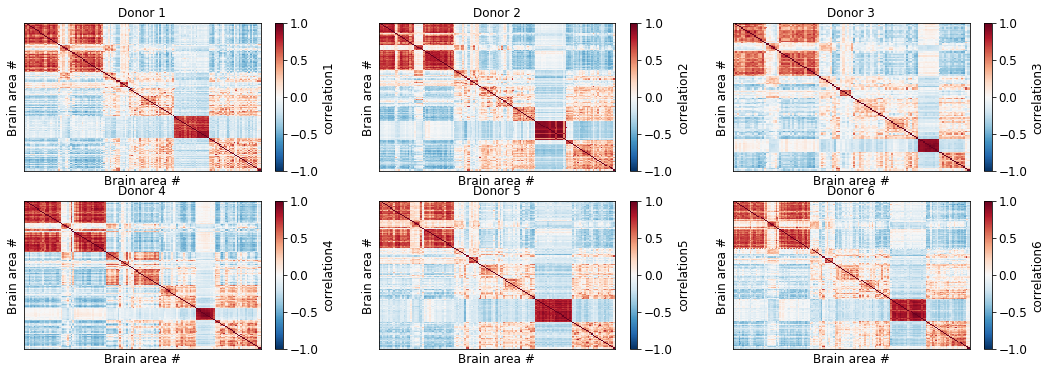

In [20]:
df_mean_subtracted1 = df1.sub(df_Exp.mean(axis=1),axis=0)
df_mean_subtracted2 = df2.sub(df_Exp.mean(axis=1),axis=0)
df_mean_subtracted3 = df3.sub(df_Exp.mean(axis=1),axis=0)
df_mean_subtracted4 = df4.sub(df_Exp.mean(axis=1),axis=0)
df_mean_subtracted5 = df5.sub(df_Exp.mean(axis=1),axis=0)
df_mean_subtracted6 = df6.sub(df_Exp.mean(axis=1),axis=0)
info['correlation1'] = df_mean_subtracted1.corr().values
info['correlation2'] = df_mean_subtracted2.corr().values
info['correlation3'] = df_mean_subtracted3.corr().values
info['correlation4'] = df_mean_subtracted4.corr().values
info['correlation5'] = df_mean_subtracted5.corr().values
info['correlation6'] = df_mean_subtracted6.corr().values
plt.subplot(231)
summarize(info,'correlation1',quiet=True)
plt.xlabel('Brain area #')
plt.ylabel('Brain area #');
plt.title('Donor 1',fontsize=12)

plt.subplot(232)
summarize(info,'correlation2',quiet=True)
plt.xlabel('Brain area #')
plt.ylabel('Brain area #');
plt.title('Donor 2',fontsize=12)

plt.subplot(233)
summarize(info,'correlation3',quiet=True)
plt.xlabel('Brain area #')
plt.ylabel('Brain area #');
plt.title('Donor 3',fontsize=12)

plt.subplot(234)
summarize(info,'correlation4',quiet=True)
plt.xlabel('Brain area #')
plt.ylabel('Brain area #');
plt.title('Donor 4',fontsize=12)

plt.subplot(235)
summarize(info,'correlation5',quiet=True)
plt.xlabel('Brain area #')
plt.ylabel('Brain area #');
plt.title('Donor 5',fontsize=12)

plt.subplot(236)
summarize(info,'correlation6',quiet=True)
plt.xlabel('Brain area #')
plt.ylabel('Brain area #');
plt.title('Donor 6',fontsize=12)

### <font color=#B40431>DENDROGRAM - showing hierarchical organisation with respect to structural correlations

In [21]:
def my_dendrogram(features,color_threshold,truncate_mode=None,labels=None,no_labels=False,leaf_font_size=20):
    plt.figure(figsize=(44,54))
    Z = linkage(features,method='ward')
    Z[:,2] = Z[:,2]**0.25 # Warp distance for visualization purposes
    dendrogram(
        Z,
        truncate_mode=truncate_mode,  # show only the last p merged clusters
        p=25,  # show only the last p merged clusters
        color_threshold=color_threshold,
        above_threshold_color='black',
        leaf_font_size=leaf_font_size,
        labels=labels,
        no_labels=no_labels,
        orientation='right'
    );
    plt.ylabel('Intercluster distance')
    if not no_labels:
        plt.xlabel('Cluster sizes');

### <font color=#B40431>Dendrogram for donor 1 to understand the hierarchical structure

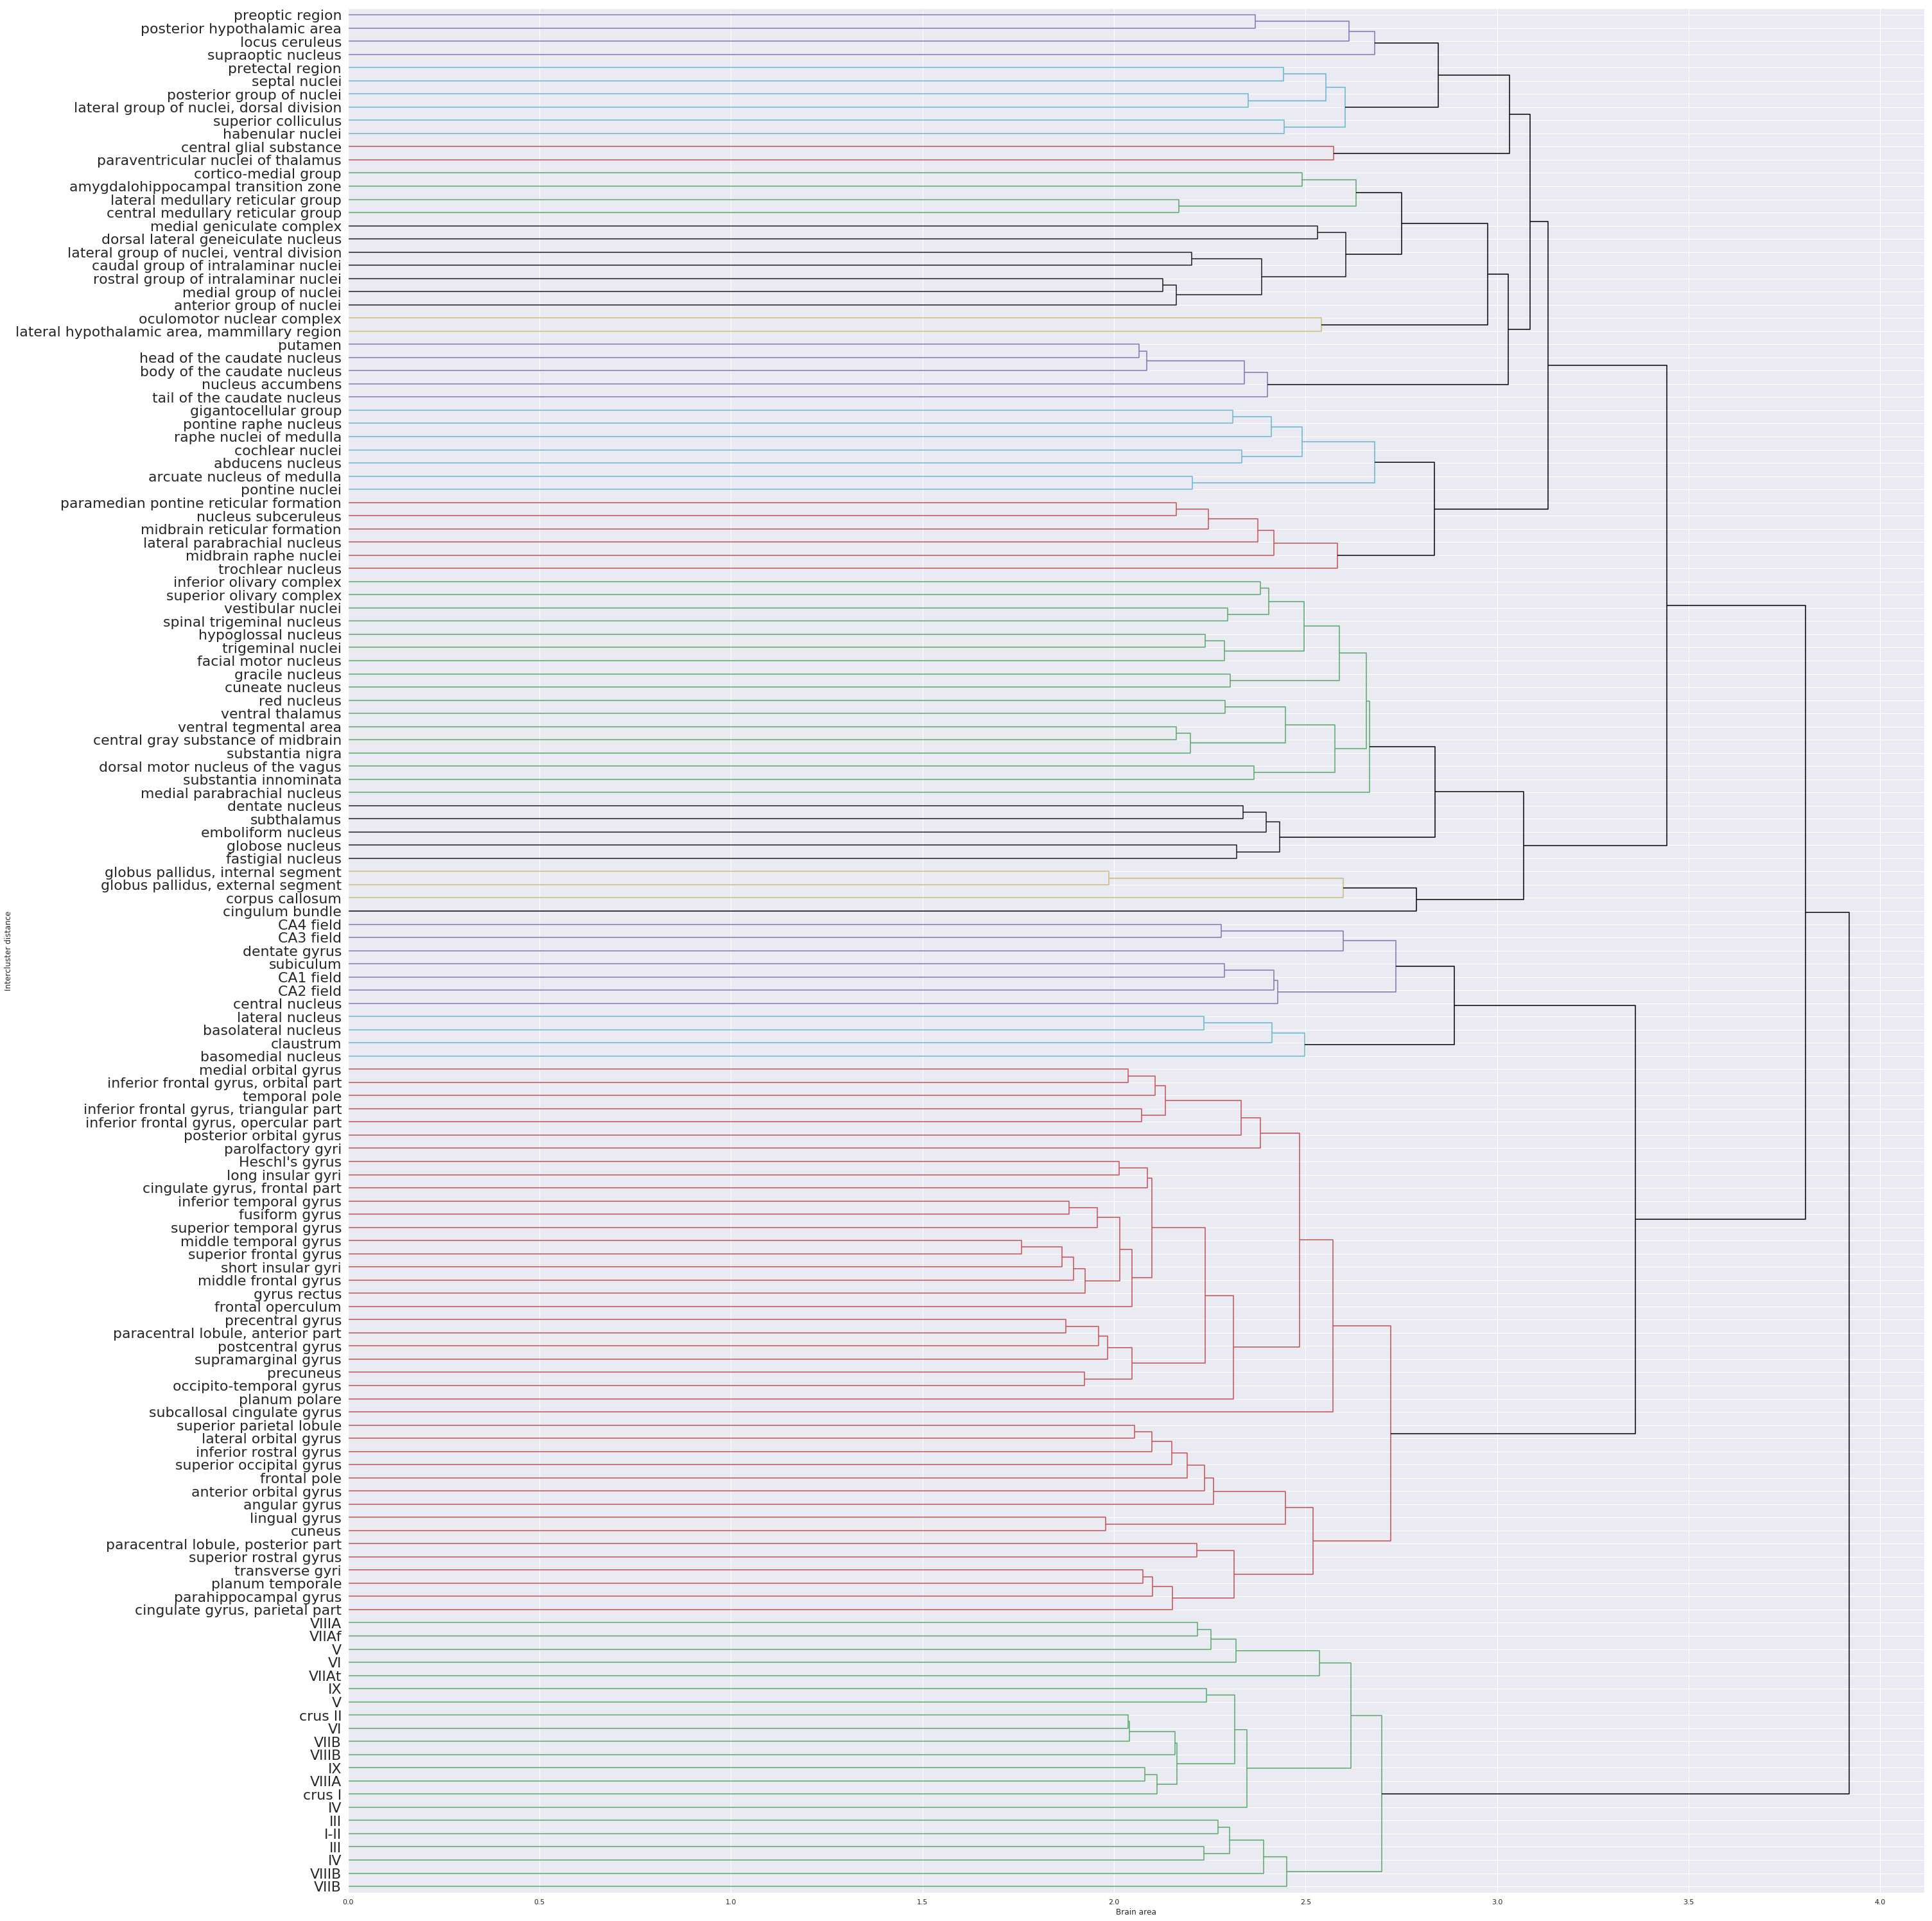

In [37]:
my_dendrogram(df_mean_subtracted1.T,None,labels=df1.columns,leaf_font_size=22)
plt.xlabel('Brain area');

In [38]:
#my_dendrogram(df_mean_subtracted1.T,None,truncate_mode='lastp') can be used to see the truncated model of dendrogram

In [24]:
import seaborn as sns
sns.set()

<font color=#B40431><b><font size=4>Clustering of brain structures in order to understand the correlation

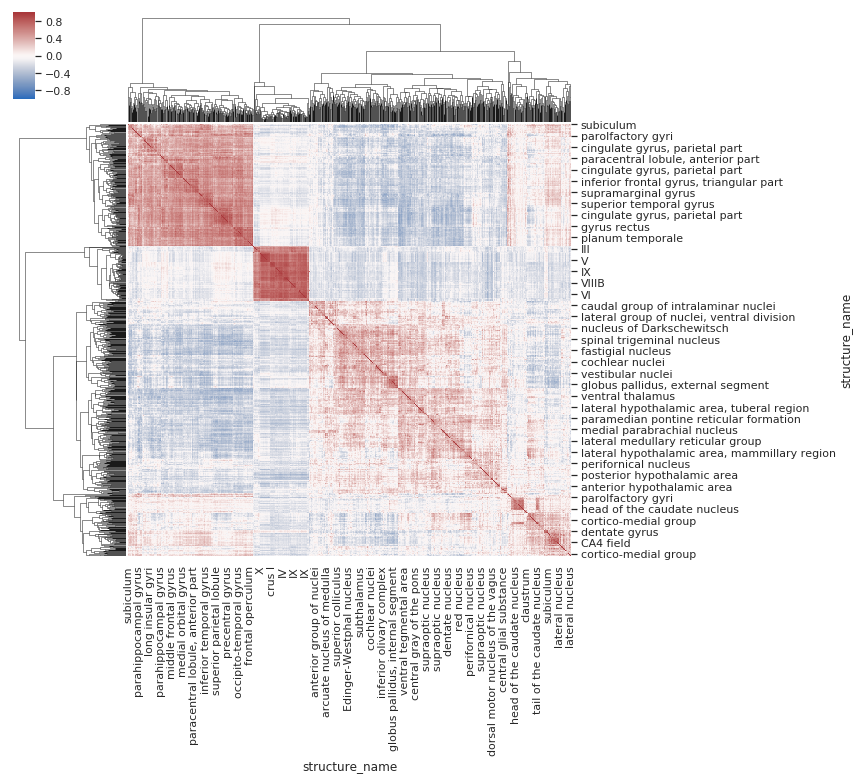

In [25]:
df=df_Exp.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
sns.clustermap(df.corr(),cmap='vlag',vmin=-1,vmax=1);

In [26]:
df_Pro= pd.read_csv('Probes.csv')#Assigning the gene names from Probes file to clustering
gene=df_Pro['gene-name']
gene = df1.set_index(gene)

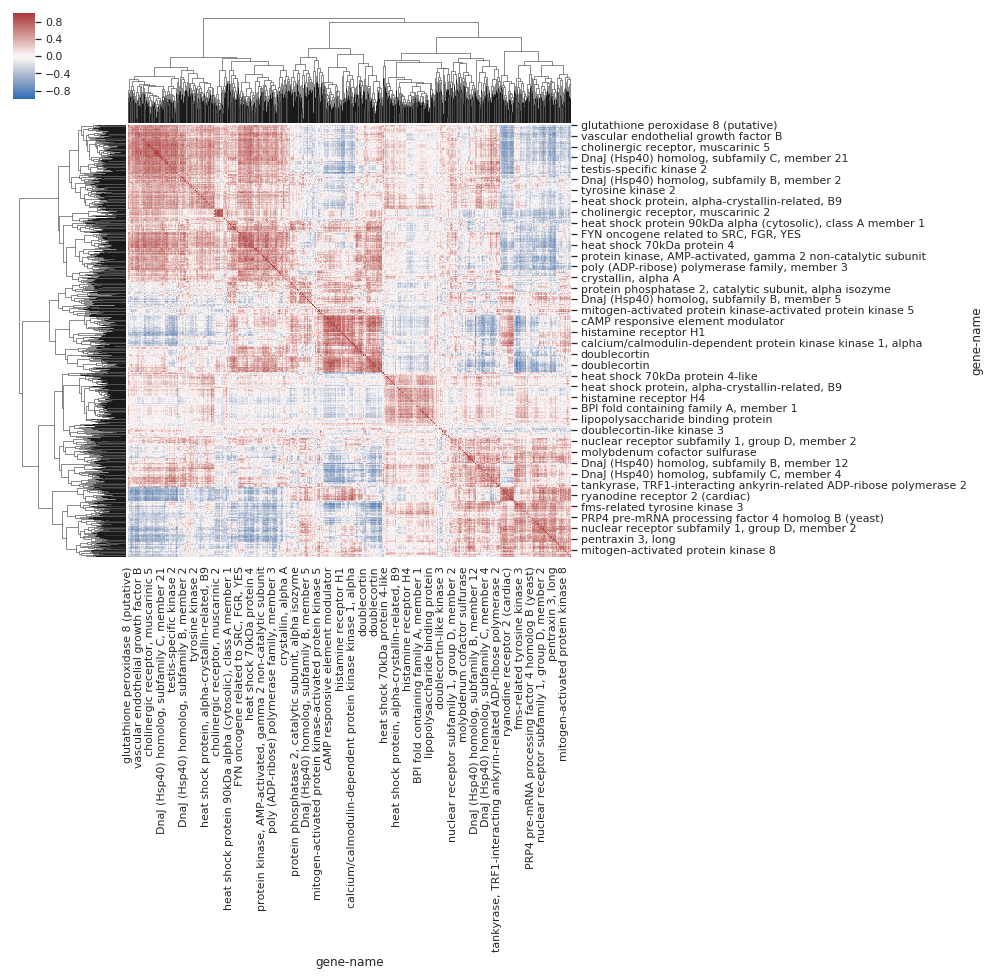

In [27]:
sns.clustermap(gene.iloc[:,:].T.corr(),cmap='vlag',vmin=-1,vmax=1); #gene clustering

<font color=#B40431><b><font size=4><b>Running PRINCIPAL COMPONENT ANALYSIS help us in finding which structures show higher variance when compared to other structures

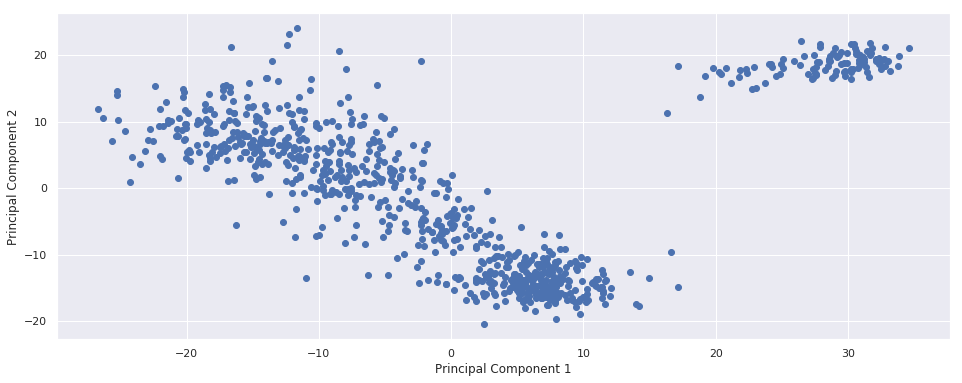

In [51]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df.T)#inputting the dataset to the pre defined function in order to perform PCA
plt.scatter(pca_features[:,0],pca_features[:,1])#taking PC1 and PC2 which can show highest variance
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

In [29]:
df_pca = pd.DataFrame(pca_features, index=df.columns)
df_pca[df_pca[0]>20].head()#taking the structure which shows highest variance

,0,1
structure_name,,
III,20.362885,17.074162
IV,22.285393,17.820975
V,28.491306,18.365965
VI,20.806015,17.991854
VIIAf,24.876578,17.114630


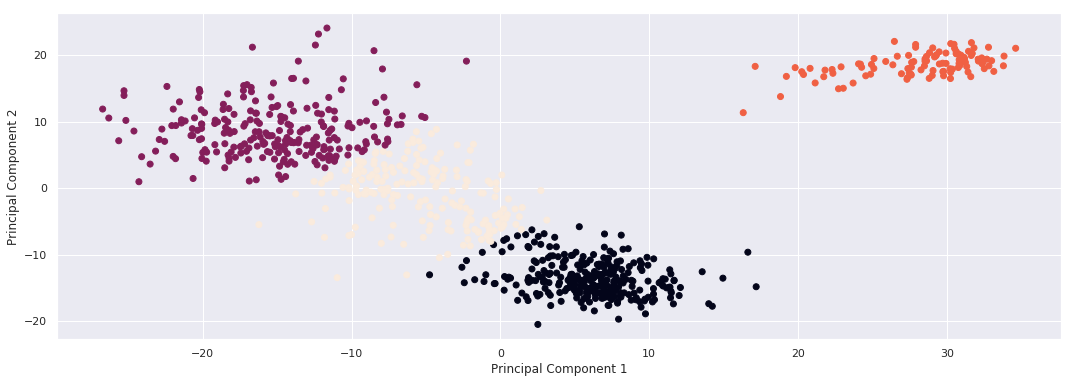

In [30]:
kmeans = KMeans(n_clusters=4)#kmeans cluster can help in finding the structures taht are most associated to each other
n_components = 3
kmeans.fit(pca_features)
plt.scatter(pca_features[:,0],pca_features[:,1],c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

In [31]:
kmeans.labels_.shape

(841,)

In [47]:
A=list(df.columns[kmeans.labels_==2])#list containing the structures that are from cluster 2(most variance)

In [48]:
def Remove(duplicate): #function to remove the duplicates from the list
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

In [49]:
Remove(A)

['I-II',
 'III',
 'IV',
 'V',
 'VI',
 'VIIAf',
 'VIIAt',
 'VIIB',
 'VIIIA',
 'VIIIB',
 'IX',
 'crus I',
 'crus II',
 'X']

<img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4561403/bin/KimLM037291f01.jpg" height="422" width="422" align="left">
<img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC419887/bin/zmb0120441320006.jpg" height="422" width="422" align="right">

### These are the substructures which shows high variance. These substructures are associated to the <font color = "blue">"CEREBELLAR CORTEX"</font>, involving the <font color = "blue">prefrontal cortex which helps in the regulation of HPA.